<a href="https://colab.research.google.com/github/nomi181472/MS-DS-Practice/blob/main/ML/Clustering/NomanAli_k238069_Assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Downloading dataset and preprocessing**

In [1]:
import warnings
import numpy as np
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA  # For dimensionality reduction
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
from sklearn.metrics import pairwise_distances
warnings.filterwarnings('ignore')

In [2]:
!gdown --id '13LpbAmJJffVffWIDZ2xtTGdThZX5F-ne'


/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=13LpbAmJJffVffWIDZ2xtTGdThZX5F-ne
From (redirected): https://drive.google.com/uc?id=13LpbAmJJffVffWIDZ2xtTGdThZX5F-ne&confirm=t&uuid=c778609a-4548-4357-9ec5-9ca93f908e16
To: /content/transactions.zip
100% 69.2M/69.2M [00:00<00:00, 135MB/s]


In [3]:
!unzip 'transactions.zip'  -d credit/

Archive:  transactions.zip
  inflating: credit/creditcard.csv   


In [4]:
import pandas as pd
import plotly.express as px
df=pd.read_csv("/content/credit/creditcard.csv",)
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
df["Class"].unique()

array([0, 1])

In [10]:

import plotly.express as px
import seaborn as sns
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
fig = px.histogram(df["Class"], width=600, height=400, labels={'value':'Class'})
fig.show()

<Axes: xlabel='Time', ylabel='Density'>

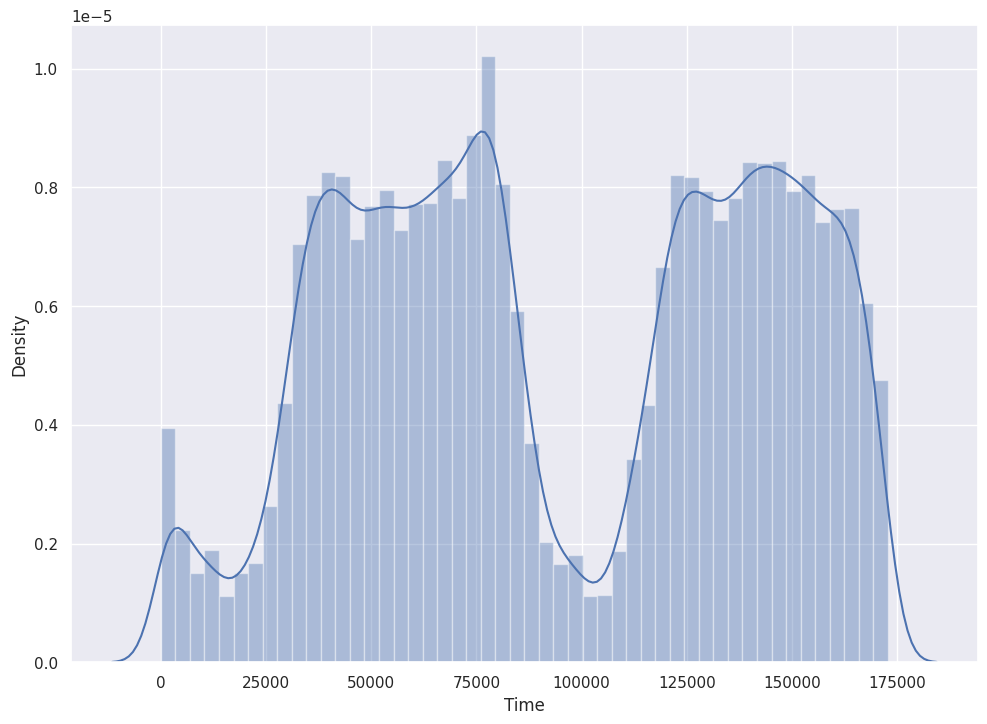

In [11]:
sns.distplot(df['Time'],)

In [12]:
#df=df.drop("Time",axis=1)

<Axes: xlabel='Amount', ylabel='Density'>

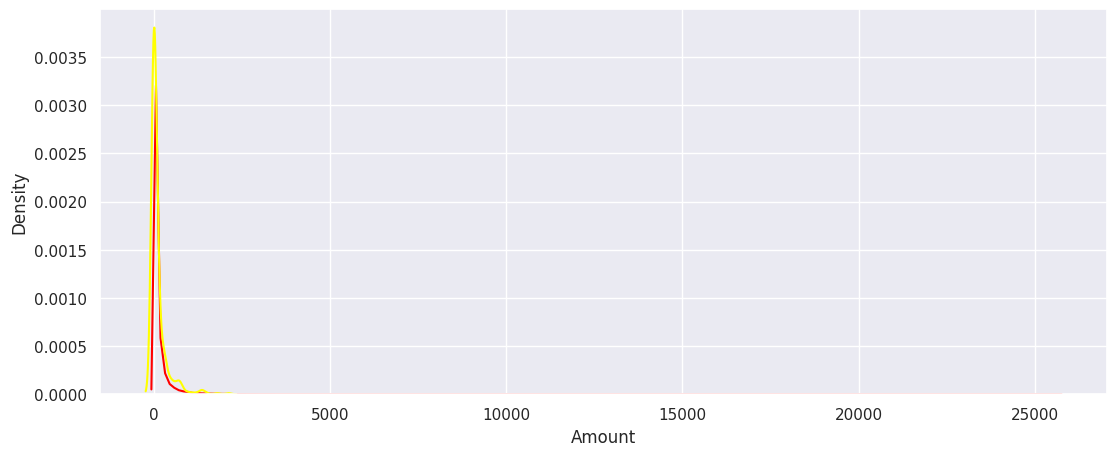

In [13]:
# Visualize amounts
plt.figure(figsize=(13, 5))
sns.kdeplot(data=df[df["Class"] == 0], x='Amount', color='red')
sns.kdeplot(data=df[df["Class"] == 1], x='Amount', color='yellow')

##**Applying KMeans Clustering Algorithm**

In [14]:
X,y=df[df.columns[0:-1]].values, df["Class"]

In [15]:
kmeans_kwargs = {
  "init": "k-means++",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}
sse = []
for k in range(1, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(X)
  sse.append(kmeans.inertia_)
sse

[642290673946061.8,
 118320091408060.28,
 63002567292877.2,
 35678950792296.32,
 23684457876528.58,
 17435929391370.113,
 11875519159826.344,
 9448677951958.732,
 7511462250856.934,
 6118659332550.363]

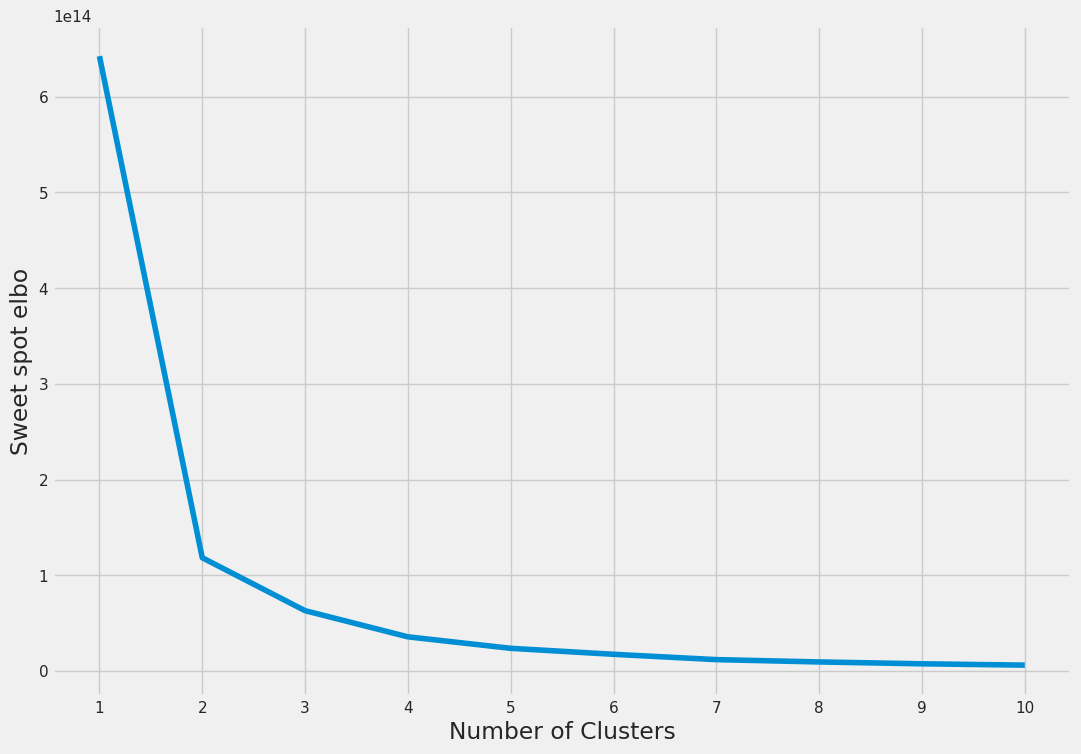

In [16]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Sweet spot elbo")
plt.show()

In [49]:


kmeans = KMeans(n_clusters=2, n_init='auto')
kmeans.fit(X)

labels = kmeans.labels_
print("Cluster labels:", labels)

centers = kmeans.cluster_centers_

print("Cluster centers:")
print(centers)
print(len(labels))
print(np.unique(labels))

Cluster labels: [1 1 1 ... 0 0 0]
Cluster centers:
[[ 1.41078087e+05  2.73859060e-01 -5.15280310e-02 -7.06907529e-01
  -1.55054048e-01  2.79426391e-01 -8.09432533e-02  1.21036474e-01
  -6.12726882e-02  4.05794273e-02  3.44791995e-02 -2.43799983e-01
   3.74762056e-02 -3.35911499e-02 -6.53336078e-02 -2.12107461e-01
   1.37941869e-02 -5.09886510e-02  8.25541949e-02  2.46431652e-02
  -4.59886059e-02  4.32908900e-02  1.27686744e-01  3.32550344e-02
  -1.36133994e-02 -1.35708703e-01 -2.67169577e-02 -2.17930579e-03
  -3.32351844e-03  8.79990966e+01]
 [ 5.50479494e+04 -2.35392555e-01  4.42903545e-02  6.07614622e-01
   1.33275008e-01 -2.40177893e-01  6.95738866e-02 -1.04035575e-01
   5.26662679e-02 -3.48796021e-02 -2.96362182e-02  2.09555604e-01
  -3.22122619e-02  2.88729049e-02  5.61567868e-02  1.82314644e-01
  -1.18566422e-02  4.38267363e-02 -7.09585538e-02 -2.11817627e-02
   3.95290023e-02 -3.72102102e-02 -1.09751742e-01 -2.85840005e-02
   1.17012483e-02  1.16646929e-01  2.29642683e-02  1.873

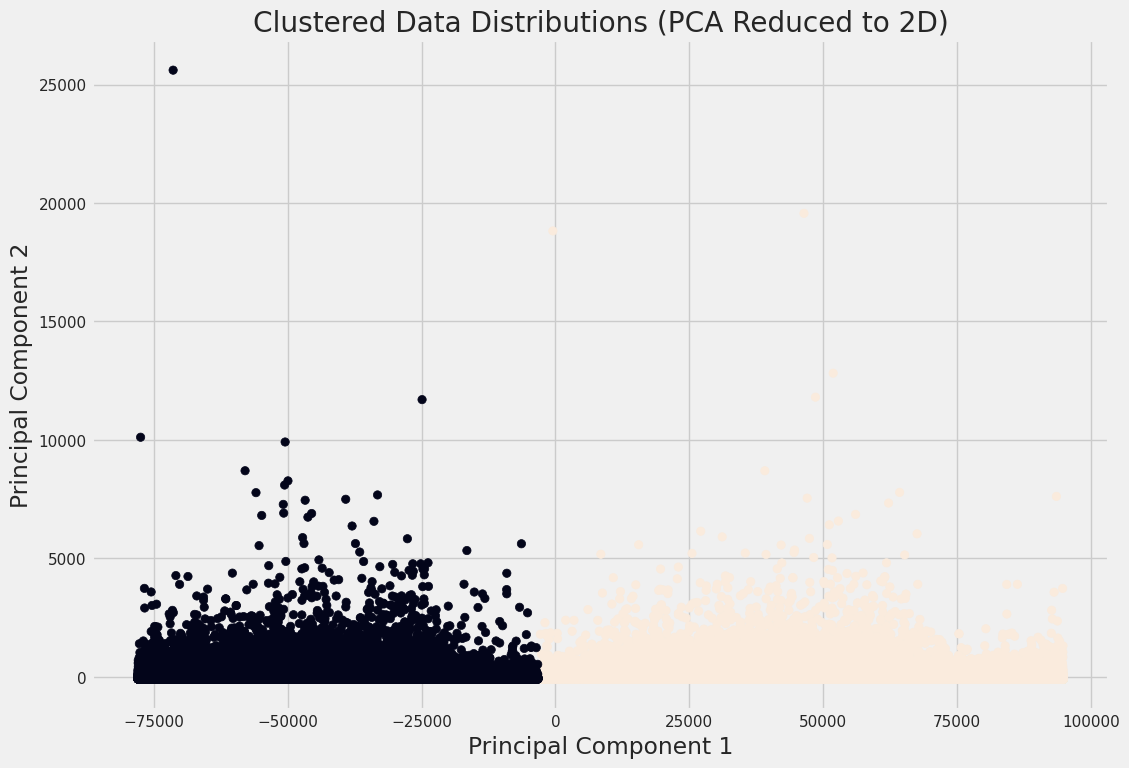

In [20]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(reduced_data)
cluster_labels = kmeans.labels_
def plot_clusters(data, cluster_labels):
  plt.scatter(data[:, 0], data[:, 1], c=cluster_labels)
  plt.title("Clustered Data Distributions (PCA Reduced to 2D)")
  plt.xlabel("Principal Component 1")
  plt.ylabel("Principal Component 2")
  plt.show()
plot_clusters(reduced_data, cluster_labels)

##**Task 1: Calulating Entropy and Purity**

In [63]:

def cluster_entropy(labels):

  unique_labels, counts = np.unique(labels, return_counts=True)
  probs = counts / len(labels)
  entropy = -np.sum(probs * np.log2(probs + 1e-10))
  return entropy

entropy = cluster_entropy(labels)
print("Cluster Entropy:", entropy)


Cluster Entropy: 2.933142156412977


In [62]:
from sklearn.metrics.cluster import contingency_matrix
def cluster_purity(labels_true, labels_pred):
    cm = contingency_matrix(labels_true, labels_pred)
    purity = np.sum(np.amax(cm, axis=0)) / np.sum(cm)
    return purity
print("Cluster Purity:", cluster_purity(np.array(df["Class"]), labels))


Cluster Purity: 0.9982725143693799


##**Task2: Calculating cohesion and separation**

In [56]:




def cluster_cohesion_(X,labels,cluster_centers):
  return np.mean([np.mean(pairwise_distances(X[labels == i], [center])) for i, center in enumerate(cluster_centers)])
avg_inter_distance=cluster_cohesion_(X,labels,centers)
print("Cluster cohesion")
print(avg_inter_distance)


print("Cluster separation")
pairwise_dists = pairwise_distances(centers)
np.fill_diagonal(pairwise_dists, np.inf)
separation = np.min(pairwise_dists)
print(separation)



Cluster cohesion
16763.617219311614
Cluster separation average pairwise
86030.13800801524


##**Plots and Comparision**


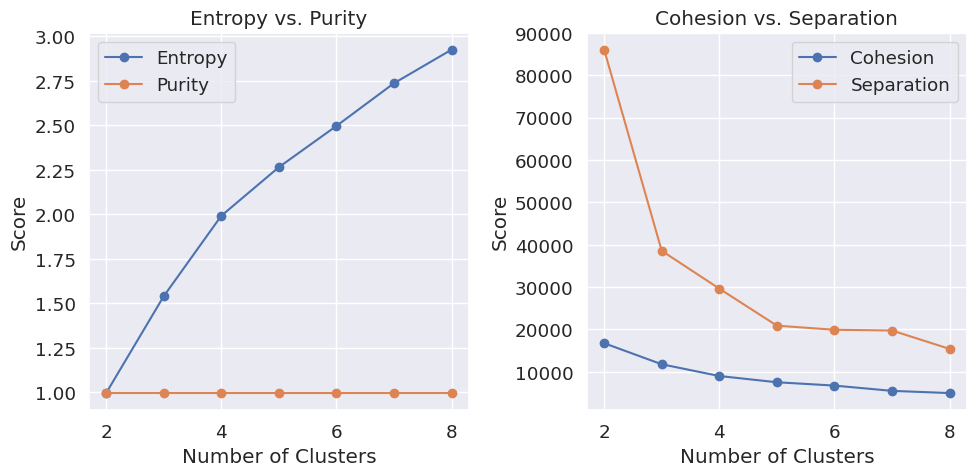

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score


min_clusters = 2
max_clusters = 20
entropy_scores = []
purity_scores = []
cohesion_scores = []
separation_scores = []
df=pd.read_csv("/content/credit/creditcard.csv",)
X,y=df[df.columns[0:-1]].values, df["Class"]
for n_clusters in range(min_clusters, max_clusters+1):
    kmeans = KMeans(n_clusters=n_clusters,n_init='auto')
    labels = kmeans.fit_predict(X)
    silhouette_avg =1 #silhouette_score(X, labels)
    entropy = cluster_entropy(labels)
    purity = cluster_purity(df["Class"],labels)
    # Calculate cluster centers
    cluster_centers = kmeans.cluster_centers_

    # Calculate cohesion
    avg_intra_cluster_distance = np.mean([np.mean(pairwise_distances(X[labels == i], [center])) for i, center in enumerate(cluster_centers)])

    # Calculate separation
    pairwise_dists = pairwise_distances(cluster_centers)
    np.fill_diagonal(pairwise_dists, np.inf)
    separation = np.min(pairwise_dists)

    # Append scores to lists
    entropy_scores.append(entropy)
    purity_scores.append(purity)
    cohesion_scores.append(avg_intra_cluster_distance)
    separation_scores.append(separation)

# Plot entropy vs. purity
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(min_clusters, max_clusters+1), entropy_scores, label='Entropy', marker='o')
plt.plot(range(min_clusters, max_clusters+1), purity_scores, label='Purity', marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Entropy vs. Purity')
plt.legend()
plt.grid(True)

# Plot cohesion vs. separation
plt.subplot(1, 2, 2)
plt.plot(range(min_clusters, max_clusters+1), cohesion_scores, label='Cohesion', marker='o')
plt.plot(range(min_clusters, max_clusters+1), separation_scores, label='Separation', marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Cohesion vs. Separation')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
